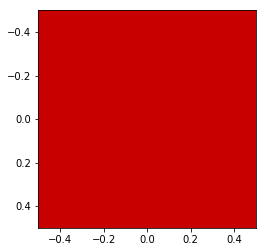

Do you see the color red?
Type yes or no


In [ ]:
### import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interact
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import nbformat as nbf
from PIL import Image
from nbconvert.preprocessors import ExecutePreprocessor
import numpy as np
import cv2

def calculateColor():
    mydict = [(i,0,0) for i in range(200,50,-20)]
    return mydict
        
        #{key: value for (key, value) in iterable}
def displayColor(r,g,b):
    plt.imshow([[(r, g, b)]])
    plt.show()  

def create_nootebook():
    # this code creates a notebook
        nb = nbf.v4.new_notebook()
        text = """\
        # My first automatic Jupyter Notebook
        This is an auto-generated notebook."""

        code = """\
        %pylab inline
        print("hallo");"""
        # here we insert text and code into the notebooks cell
        nb['cells'] = [nbf.v4.new_markdown_cell(text), nbf.v4.new_code_cell(code) ]
        #we write the notebook to the computer.
        nbf.write(nb, './test.ipynb')
        
def get_code_from_notebook():
    #we read the notebook from the computer
        nb = nbf.read('./test.ipynb', as_version=4)
        #Use jupyter kernelspec list to find out what the kernel is called on your system
        ep_python = ExecutePreprocessor(timeout=600, kernel_name='python3')
        path =  '/Users/pravien/Documents/CPH-Business/4_Semester/Python/Assignments/pythonAssignments/Project'
        # path specifies which folder to execute the notebooks in, so set it to the one that you need so your file path references are correct
        foo = ep_python.preprocess(nb,{'metadata': {'path': path}})
        #print(foo) 
        #print(dict(foo[0]).values())
        #Here i loop through the values of the keys in the cell to find the code there is in the cell
        for values in dict(foo[0]).values():
            if(not isinstance( values, int )):
                for i in values:
                    if( '%pylab' in i['source']):
                        print(i['source']) 
#r,g,b =  calculateColor()[9]

def change_color_in_picture(img,r,g,b):
    #print("r in change color to pisctire ",r)
    mask = (img[:,:,0] >0) & (img[:,:,1] >0) & (img[:,:,2] > 0)
    #print(mask)
    #green_lower = np.array([0, 0, 0])
    #green_upper = np.array([255, 120, 120])
    #mask = cv2.inRange(image, green_lower,green_upper)
    #Change the color on the picture where the mask is fufilled to the r,g,b value
    #if color != 0:
    #    img[mask] = np.array([0, 0, 0])
    #else:
    #     img[mask] = np.array([255, 255, 255])
    #print("rgb farver: ",r,g,b)
    img[mask] = np.array([r,g,b])
    image_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv2.cvtColor(image_, cv2.COLOR_BGR2RGB), interpolation='None')
    plt.show()
    cv2.imwrite("picture"+str(r)+".png",image_)
    return image_

def display_pictures(r,g,b):
    # read the picture
    
    image = cv2.imread('./test.png')
    # converts it from BGR 2 RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    while(True):
        print("red color value is :",r)
        #plt.imshow(change_color_in_picture(temp,rand), interpolation='None')
        #plt.show()
        
        change_color_in_picture(cv2.cvtColor(cv2.imread('./test.png'), cv2.COLOR_BGR2RGB),r,g,b)
        print('Do you see the color red in this picture?')
        print('Type yes or no')
        a = input()
        
        if (a.upper() == "NO" and r+10 <=255):
            r+=10
        else :
            break 



#calccolors = calculateColor()
for r,g,b in calculateColor():
    code = """\
        print("hallo");"""
    nbf.v4.new_code_cell(source=[code])
    #nbf.v4.output_from_msg(5)
    displayColor(r,g,b)
    print('Do you see the color red?')
    print('Type yes or no')
    a = input()
   
    #test = np.asarray(destRGB)  
    if (a.upper() == "NO"):
        #print(r,g,b)
        display_pictures(r,g,b)
        break
        #cv2.imshow('Wallpaper-2.jpg',img)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        #Image('/Users/pravien/Documents/CPH-Business/4_Semester/Python/Assignments/pythonAssignments/Project/Wallpaper-2.jpg')
        #plt.imshow(img)
        #plt.show()
        #break
        

  